# BIRCH Clustering

About Dataset : Loan dataset have 150k rows and 5 columns.

Motive :In this analysis, we will observe different clusters in our dataset. The hardness of the problem is to be able to 
find the clusters in this very large dataset. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
df =pd.read_csv("E:/sakshi/all subjects of MS/Trimester 6/Predictive Analytics/Class 6/Loans.csv")

# Rows and Columns in the dataset

In [3]:
df.shape

(150302, 5)

# Top 10 records of the dataset

In [4]:
df.head(10)

,Approval,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
0,F,0.0,397,1000,450
1,F,0.0,403,500,225
2,F,0.0,408,1000,450
3,F,0.0,408,2000,900
4,F,0.0,411,5000,2250
5,F,0.0,413,5000,2250
6,F,0.0,416,6000,2700
7,F,0.0,421,2000,900
8,F,0.0,422,12000,5400
9,F,0.0,432,10000,4500


# Statstical term  of data

In [5]:
df.describe()

,Debt-to-Income Ratio,FICO Score,Request Amount,Interest
count,150302.000000,150302.000000,150302.000000,150302.000000
mean,0.183538,672.023266,13427.080145,6042.186065
std,0.137226,69.129157,9468.345958,4260.755681
min,0.000000,371.000000,500.000000,225.000000
25%,0.090000,647.000000,6000.000000,2700.000000
50%,0.160000,684.000000,11000.000000,4950.000000
75%,0.240000,714.000000,19000.000000,8550.000000
max,1.030000,869.000000,44000.000000,19800.000000


# EDA of Loan data

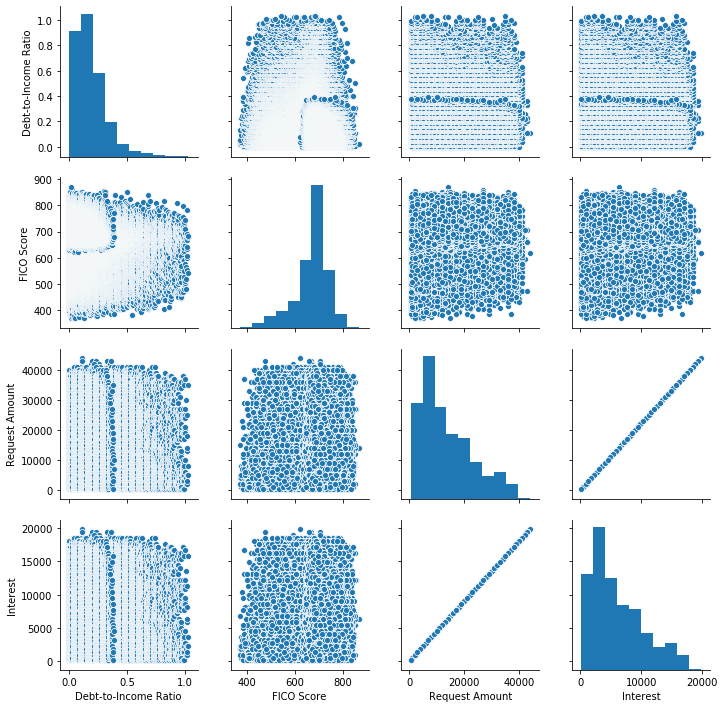

In [6]:
sns.pairplot(df)

we can see that request amount and Interest are linearly correlated.

# Histogram of Data Variables

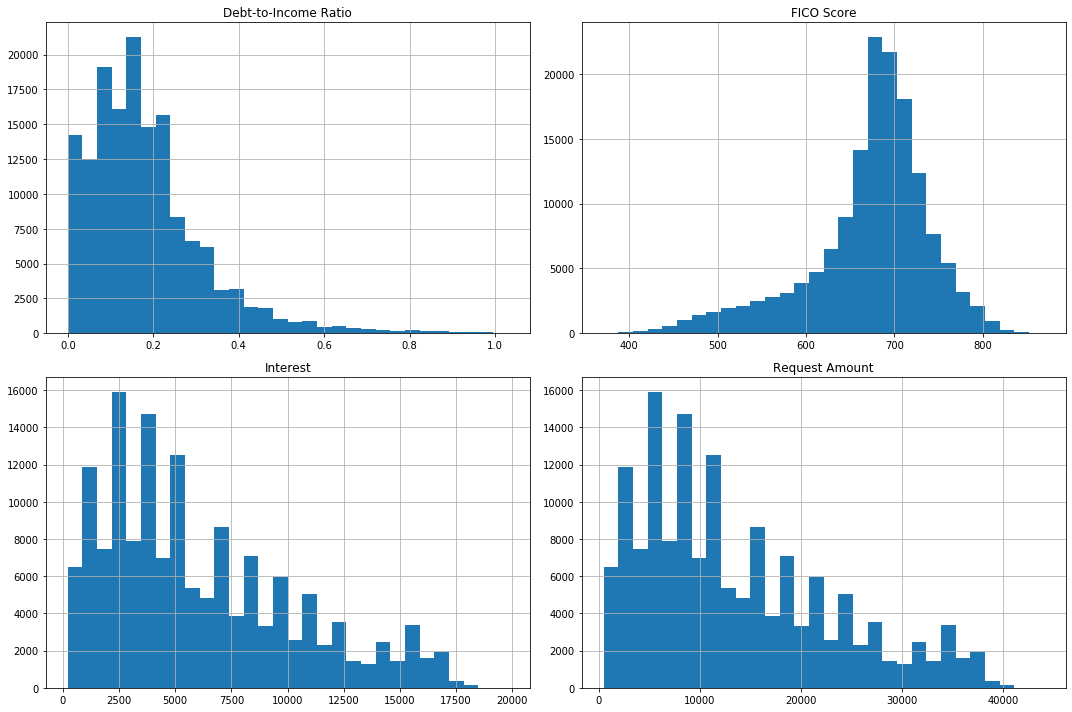

In [48]:
df.hist(bins=30, figsize=(15,10))
plt.tight_layout()    
plt.show()

# Segregating dataset into dependents and independents variable

In [8]:
X = df.iloc[:, 1:5]
y = df.loc[0:,'Approval']

# Splitting data into train and test 

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Birch Clustering 

When threshold=0.5, n_clusters= 2, branching_factor=50


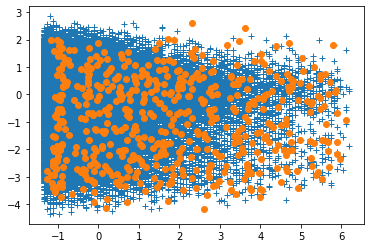

Subcluster at threshold=0.5, n_clusters= 2, branching_factor=50


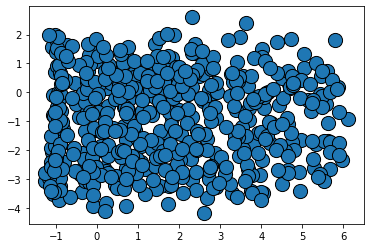

In [32]:
from sklearn.cluster import Birch, MiniBatchKMeans, KMeans


brc = Birch(threshold=0.5, n_clusters= 2, branching_factor=50)
brc_model1=brc.fit(X_train_scaled)
labels = brc.predict(X_test)

# result
n_clusters = np.unique(labels).size
print("When threshold=0.5, n_clusters= 2, branching_factor=50")

c = brc.subcluster_centers_
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()



centers = brc_model1.subcluster_centers_
print('Subcluster at threshold=0.5, n_clusters= 2, branching_factor=50')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', alpha=1, s=200, edgecolor='k')

When threshold=, n_clusters= 3 branching_factor=100


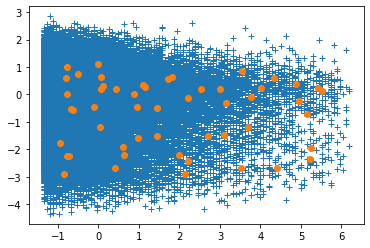

Subcluster at threshold=1 n_clusters= 3 ,ranching_factor=100


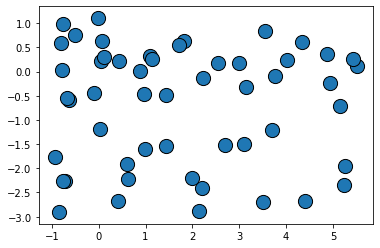

In [33]:

from sklearn.cluster import Birch, MiniBatchKMeans, KMeans

brc = Birch(threshold= 1, n_clusters= 3, branching_factor= 100)
brc_model2= brc.fit(X_train_scaled)
labels = brc.predict(X_test)

# result
n_clusters = np.unique(labels).size
print("When threshold=, n_clusters= 3 branching_factor=100")

c = brc.subcluster_centers_
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()



centers = brc_model2.subcluster_centers_
print('Subcluster at threshold=1 n_clusters= 3 ,ranching_factor=100')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', alpha=1, s=200, edgecolor='k')

When threshold=2, n_clusters= 4, branching_factor=150


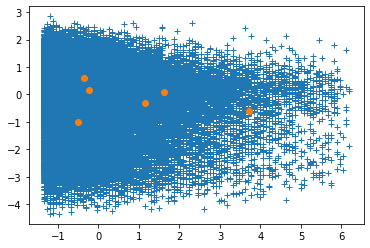

Subcluster at threshold=0.5, n_clusters= 2, branching_factor=50


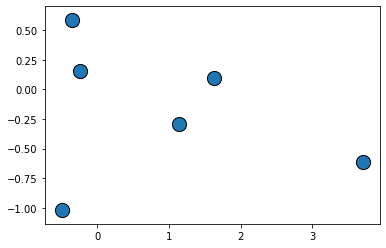

In [34]:

from sklearn.cluster import Birch, MiniBatchKMeans, KMeans


brc = Birch(threshold= 2, n_clusters= 3, branching_factor= 150)
brc_model3= brc.fit(X_train_scaled)
labels = brc.predict(X_test)

# result
n_clusters = np.unique(labels).size
print("When threshold=2, n_clusters= 4, branching_factor=150")

c = brc.subcluster_centers_
plt.plot(X_train_scaled[:,0], X_train_scaled[:,1], '+')
plt.plot(c[:,0], c[:,1], 'o')
plt.show()


centers = brc_model3.subcluster_centers_
print('Subcluster at threshold=0.5, n_clusters= 2, branching_factor=50')
plt.scatter(centers[:, 0], centers[:, 1], marker='o', alpha=1, s=200, edgecolor='k')

# Silhouette analysis for KMeans clustering on data with n_clusters

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays
a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess 
parameters like number of clusters visually. This measure has a range of [-1, 1].

For n_clusters = 2 The average silhouette_score is : 0.6425487921033189
For n_clusters = 3 The average silhouette_score is : 0.5810285995548892
For n_clusters = 4 The average silhouette_score is : 0.5765907817076483
For n_clusters = 5 The average silhouette_score is : 0.5708288772927866


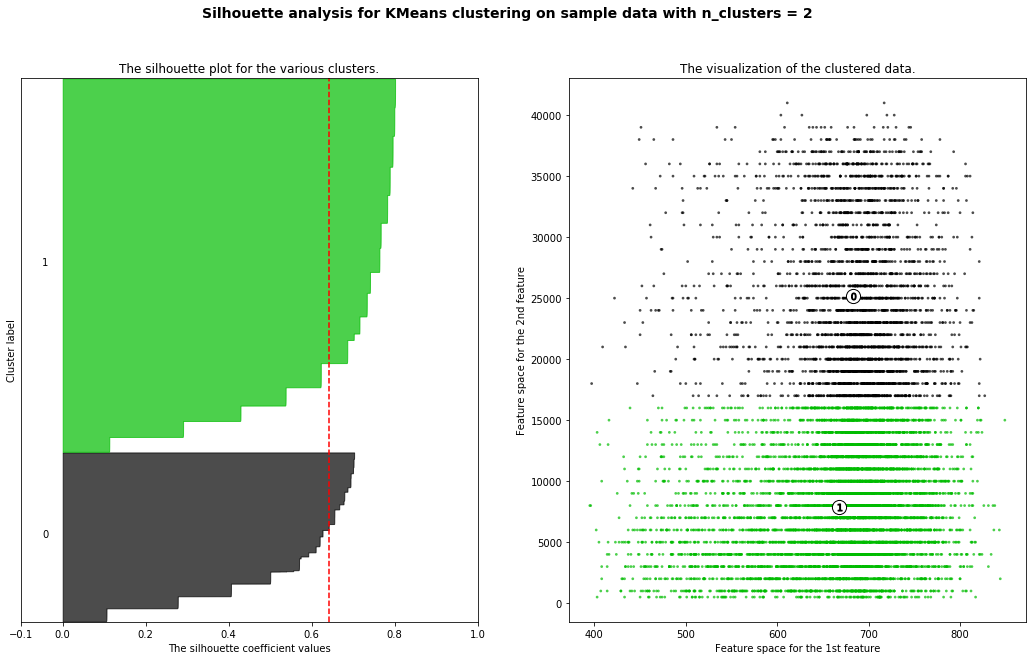

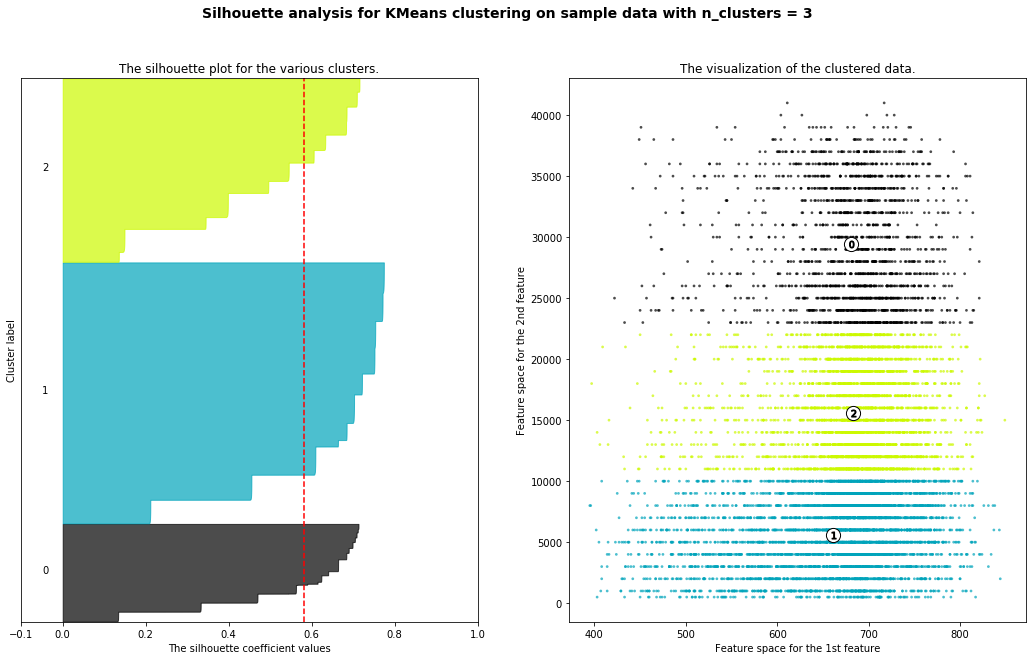

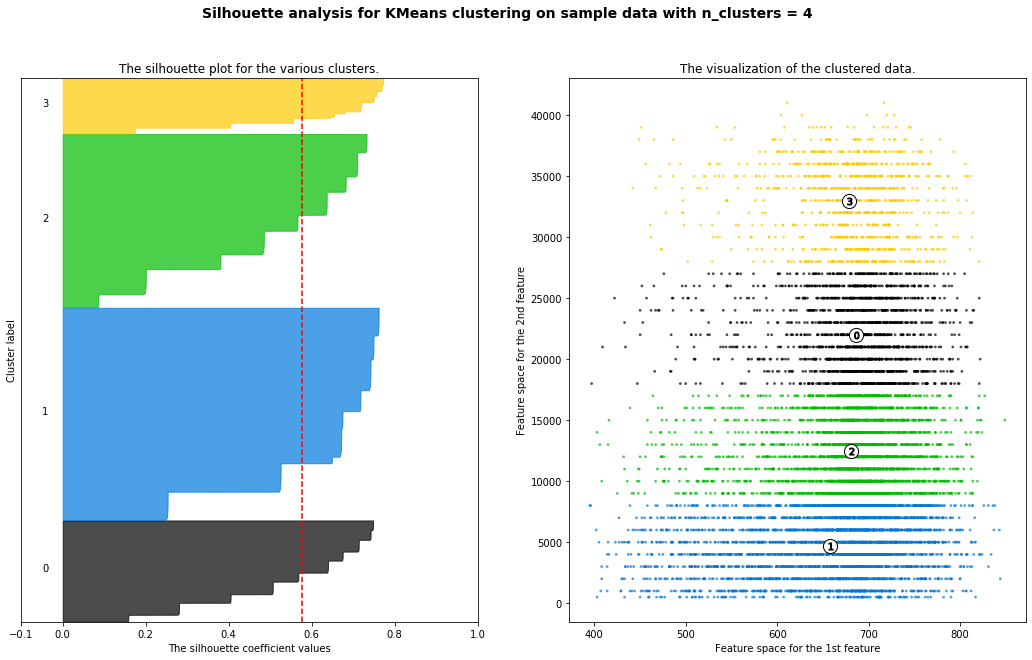

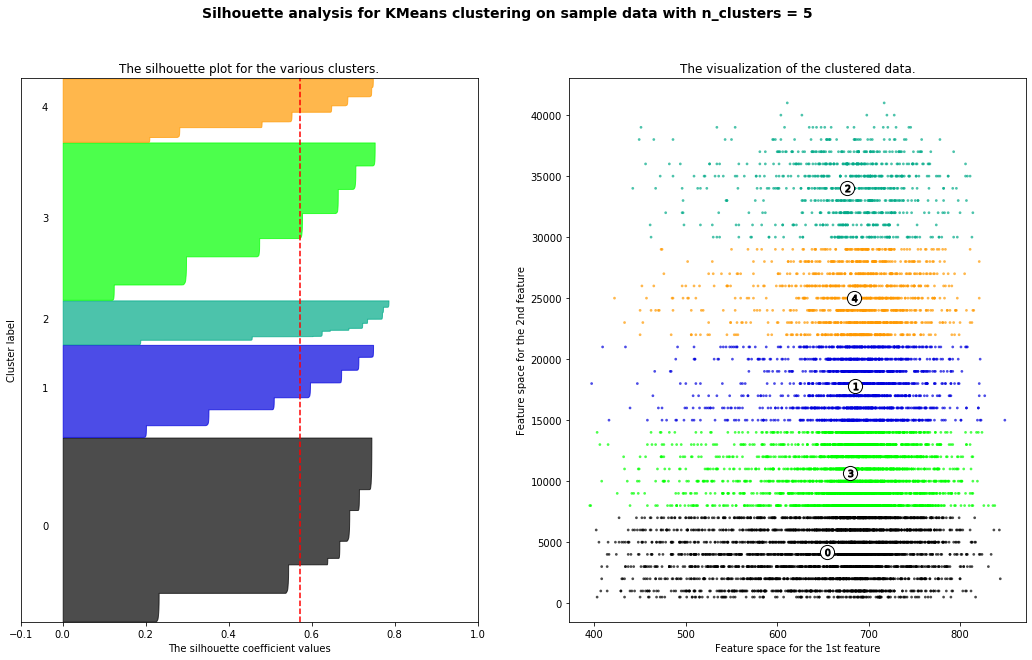

In [50]:
import matplotlib.cm as cm

range_n_clusters = [2, 3,4,5]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 10)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Conclusion

BIRCH provides a clustering method for very large datasets. It makes a large clustering problem plausible by concentrating on
densely occupied regions, and creating a compact summary. BIRCH can work with any given amount of memory, and the I/O complexity
is a little more than one scan of data. Other clustering algorithms can be applied to the subclusters produced by BIRCH.

Silhouette_Score i have found for different-different clusters are :--

--> For n_clusters = 2 The average silhouette_score is : 0.6425487921033189

--> For n_clusters = 3 The average silhouette_score is : 0.5810285995548892

--> For n_clusters = 4 The average silhouette_score is : 0.5765907817076483

--> For n_clusters = 5 The average silhouette_score is : 0.5708288772927866

Silhouette_Score are greater than 0.5 or better provides good evidence of the reality of the clusters in the data.